### 1. Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.stats import zscore 

### 2. Load Datasets

In [2]:
# Importing data frames
df_climate = pd.read_csv("data/Climate_Region.csv")
df_climate_melt = pd.read_csv("data/Climate_Region_Melted.csv")
df_weather = pd.read_csv("Weather_ISO.csv")

### 3. EDA —Country

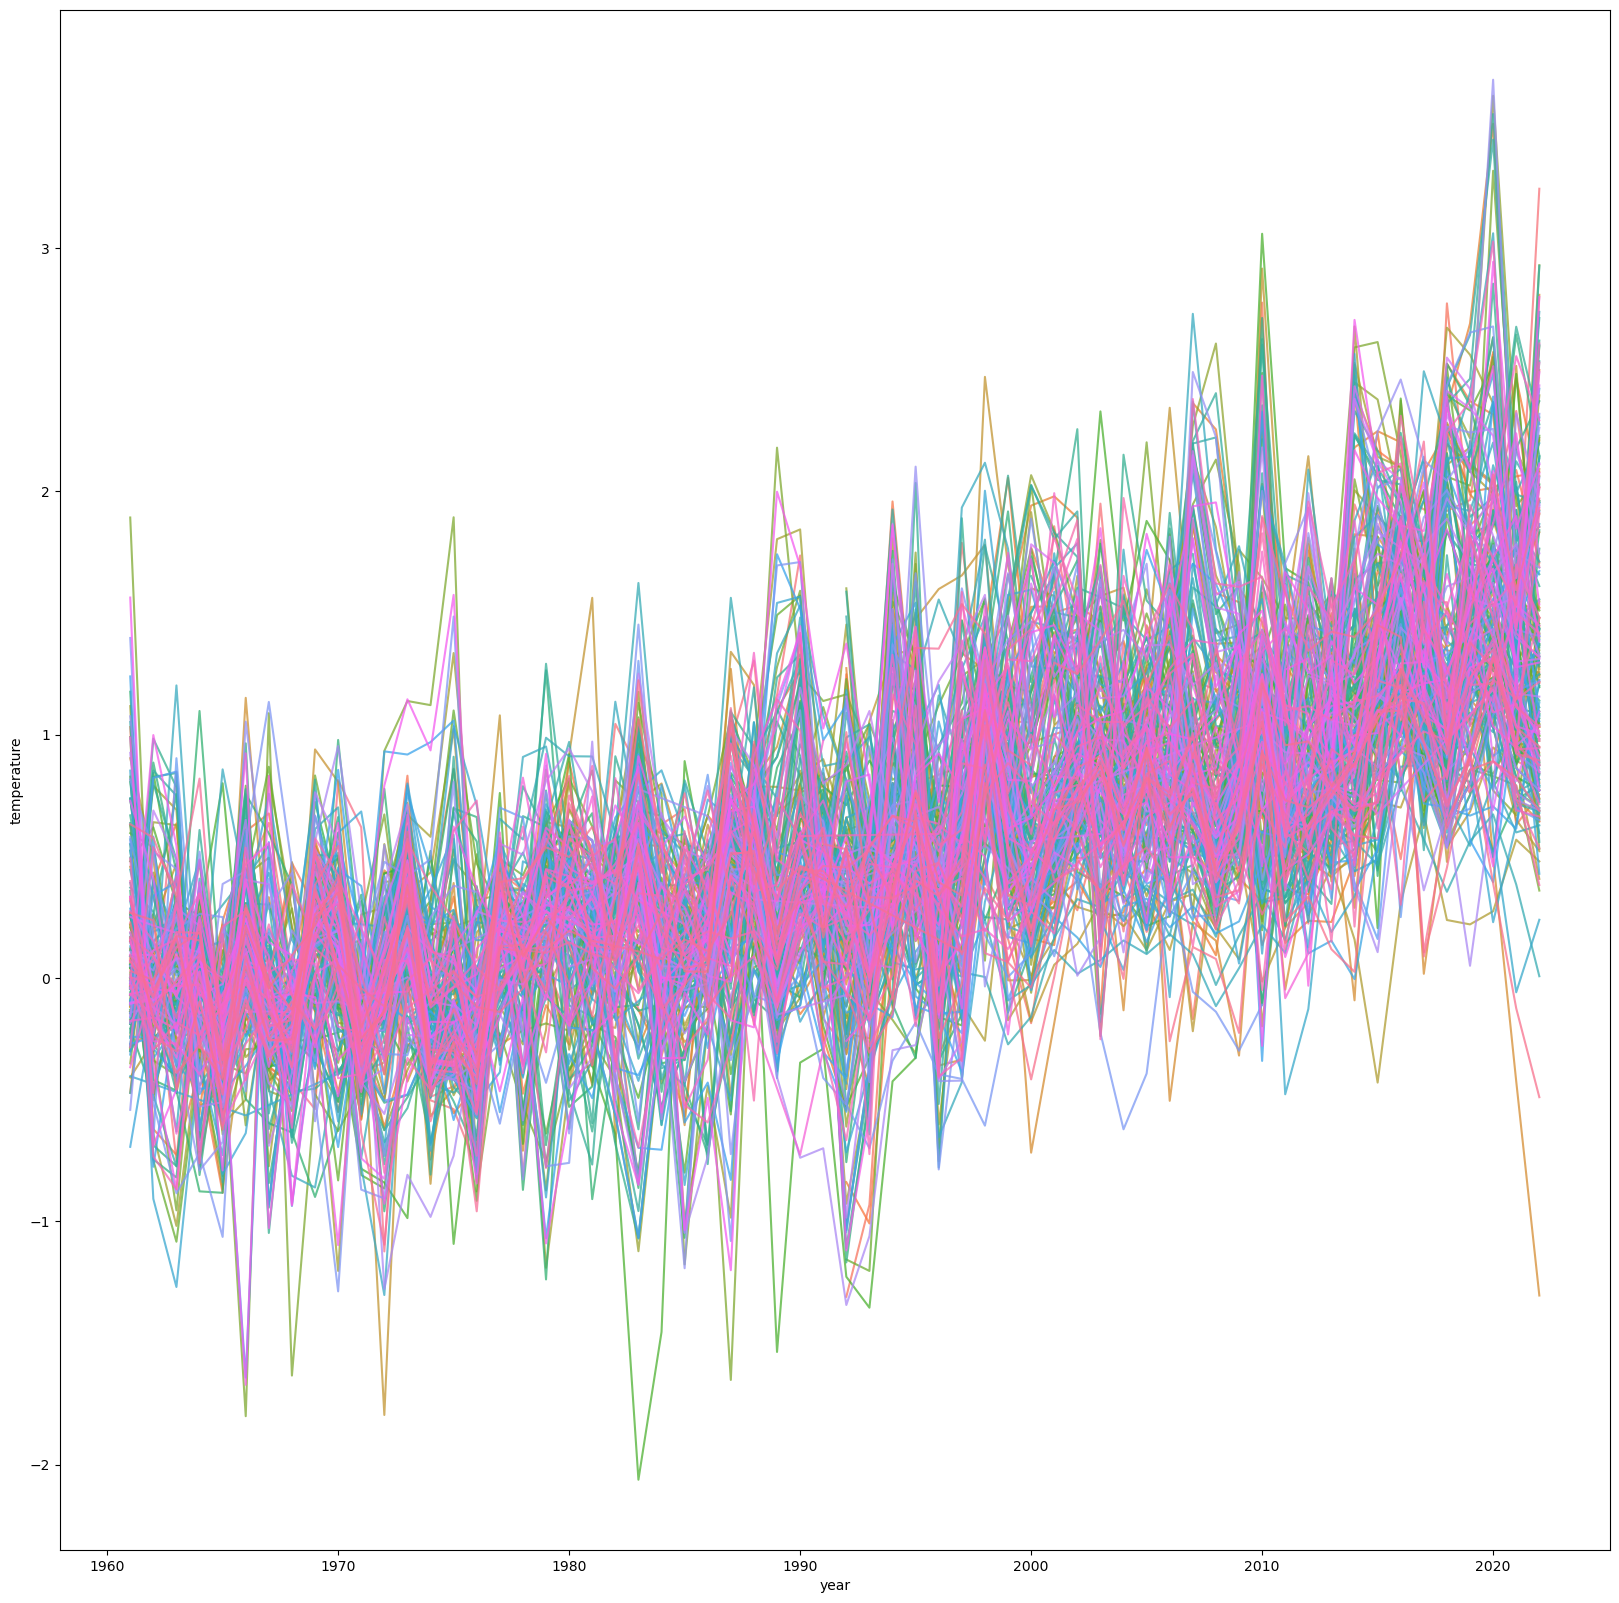

In [3]:
#Time Series Analysis of all data
plt.figure(figsize=(20, 20))
sns.lineplot(data=df_climate_melt, x='year', y='temperature', hue='country', alpha=0.75,legend = False)
plt.show()
#Overall temperature are increasing over the years

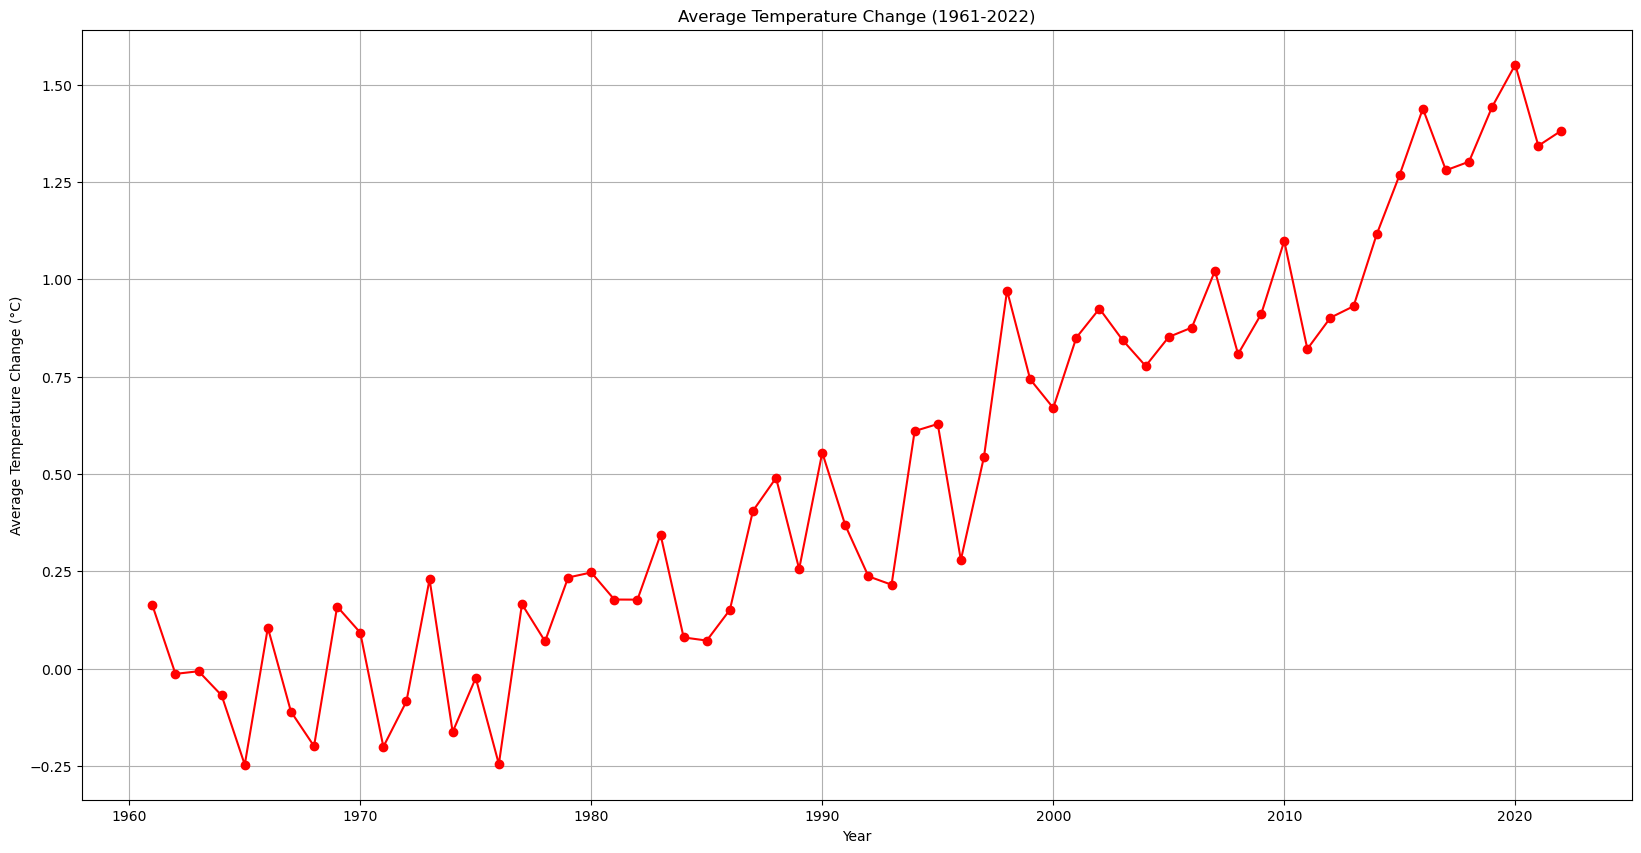

In [4]:
#Time Series Analysis of all data — Average

# Calculate the mean temperature change for each year
yearly_averages = df_climate.loc[:, '1961':'2022'].mean()

# Reset index of the series
yearly_averages_df = yearly_averages.reset_index()
yearly_averages_df.columns = ['Year', 'Average Temperature Change']

# Convert 'Year' to numeric
yearly_averages_df['Year'] = pd.to_numeric(yearly_averages_df['Year'])

# Display Plot
plt.figure(figsize=(20, 10))
plt.plot(yearly_averages_df['Year'], yearly_averages_df['Average Temperature Change'], marker='o', color='red', linestyle='-')
plt.title('Average Temperature Change (1961-2022)')
plt.xlabel('Year')
plt.ylabel('Average Temperature Change (°C)')
plt.grid(True)
plt.show()

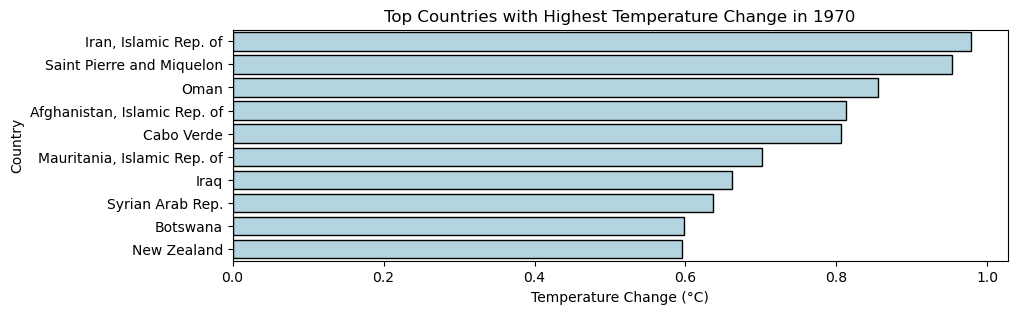

In [5]:
# Country Comparison
# Highest Temperature in 1970

# Filter positive values
positive_1970 = df_climate[df_climate['1970'] > 0]

# Find Top 10 highest positive temperature changes 1970
top_10_1970 = positive_1970.sort_values(by='1970', ascending=False).head(10)

# Plot bar chart
plt.figure(figsize=(10, 3))
sns.barplot(x='1970', y='country', data=top_10_1970, color='lightblue', edgecolor='black')
plt.title('Top Countries with Highest Temperature Change in 1970')
plt.xlabel('Temperature Change (°C)')
plt.ylabel('Country')
plt.show()

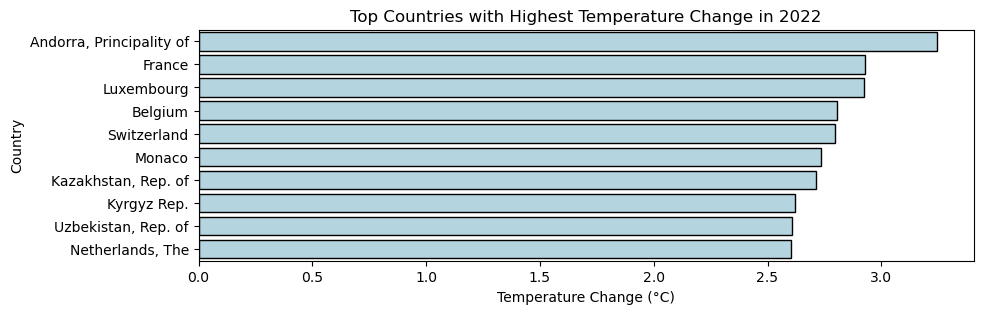

In [6]:
# Country Comparison
# Highest Temperature in 2022

# Filter positive values
positive_2022 = df_climate[df_climate['2022'] > 0]

# Find Top 10 highest positive temperature changes 2022
top_10_2022 = positive_2022.sort_values(by='2022', ascending=False).head(10)

# Plot bar chart
plt.figure(figsize=(10, 3))
sns.barplot(x='2022', y='country', data=top_10_2022, color='lightblue', edgecolor='black')
plt.title('Top Countries with Highest Temperature Change in 2022')
plt.xlabel('Temperature Change (°C)')
plt.ylabel('Country')
plt.show()

#Countries with Top Temperature change are different in 2022 from 1970, more European countries

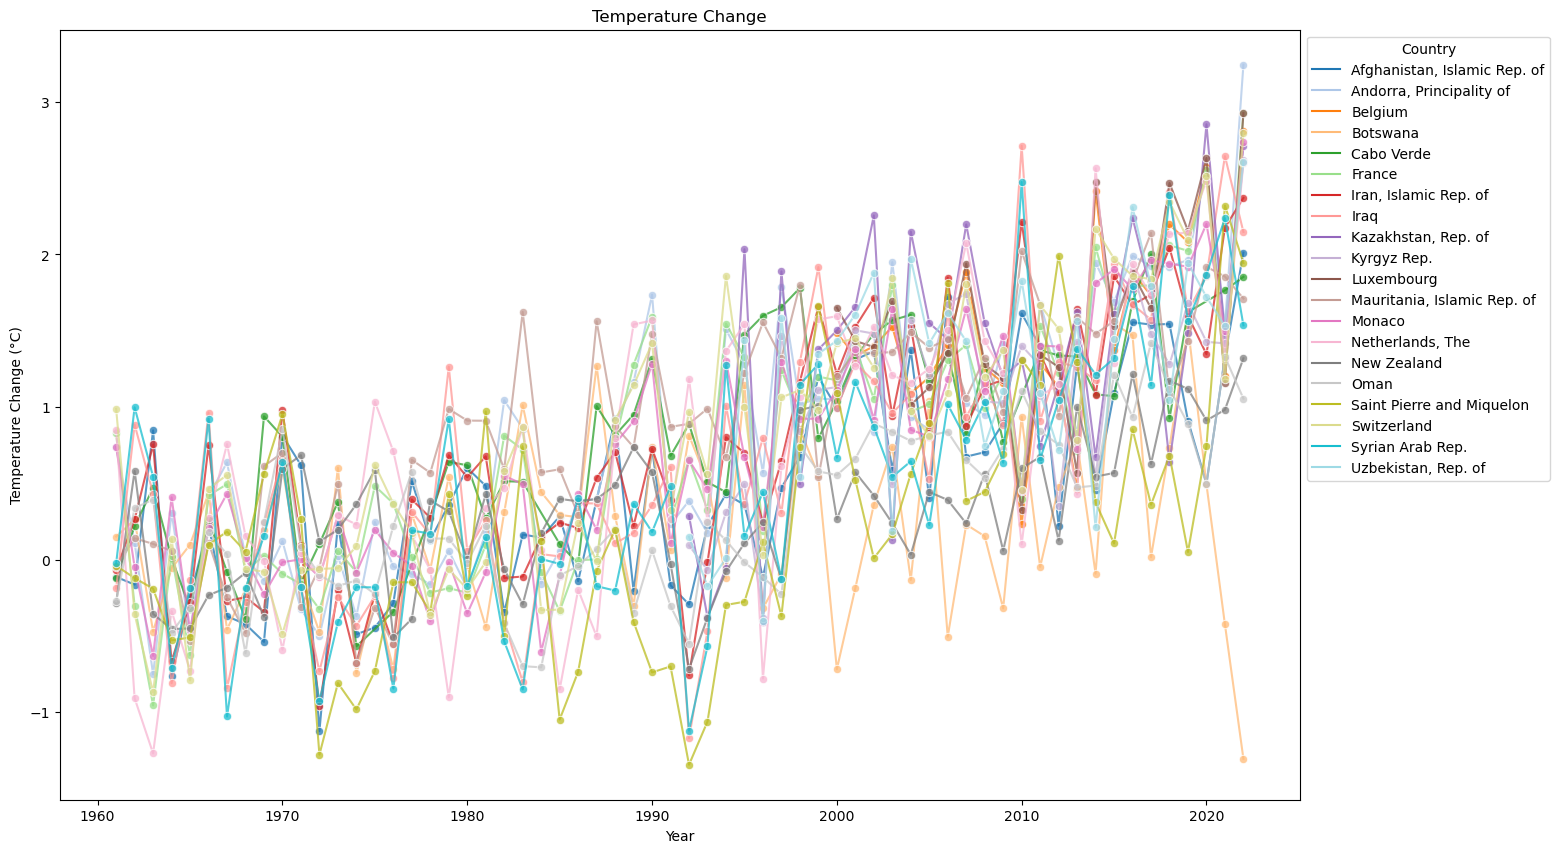

In [8]:
# Figure size
plt.figure(figsize=(16, 10))

# Create the line plot
sns.lineplot(data=df_filtered, x='year', y='temperature', hue='country', marker='o', palette='tab20', alpha=0.75)

# Display the plot
plt.title('Temperature Change')
plt.xlabel('Year')
plt.ylabel('Temperature Change (°C)')
plt.legend(title='Country', bbox_to_anchor=(1,1), loc='upper left')
plt.show()

In [24]:
import warnings

# Suppress seaborn layout warning
warnings.filterwarnings("ignore", category=UserWarning, module="seaborn")

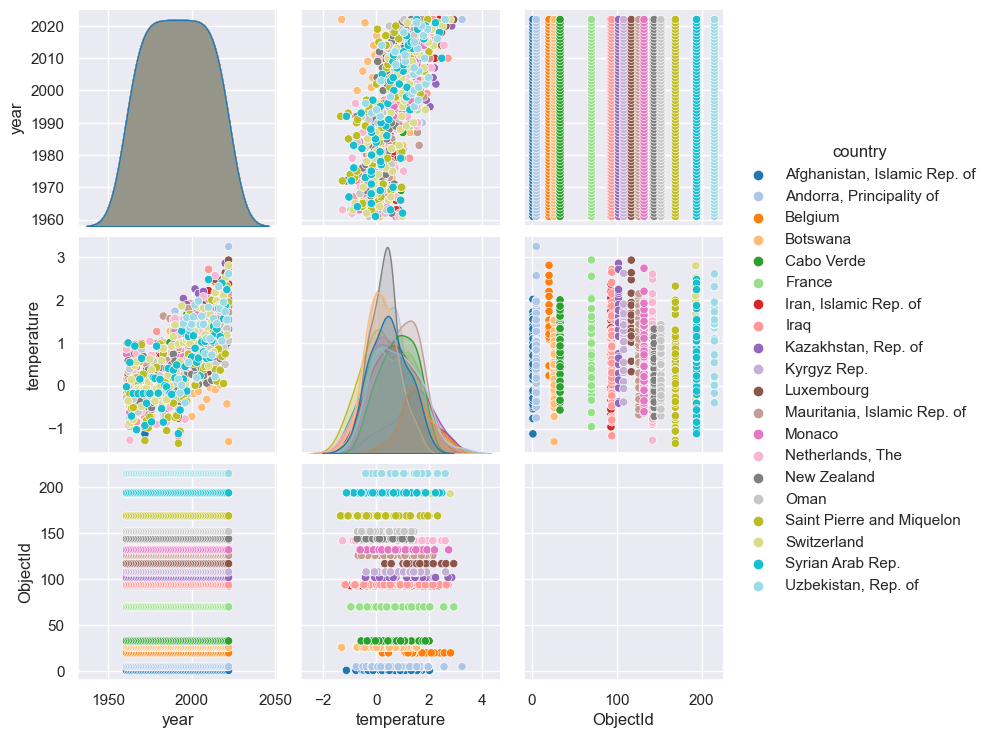

In [25]:
#Top 10 1970
positive_1970 = df_climate[df_climate['1970'] > 0]
top_10_1970 = positive_1970.sort_values(by='1970', ascending=False).head(10)

#Top 10 2022
positive_2022 = df_climate[df_climate['2022'] > 0]
top_10_2022 = positive_2022.sort_values(by='2022', ascending=False).head(10)

# Combine the two lists of top countries, uniqueness
top_countries_combined = pd.concat([top_10_1970, top_10_2022]).drop_duplicates(subset='country')
unique_top_countries = top_countries_combined['country'].unique()

# Filter melted dataset for the selected countries
df_filtered = df_climate_melt[df_climate_melt['country'].isin(unique_top_countries)]

# Display plot
sns.pairplot(data=df_filtered, hue='country', palette='tab20')

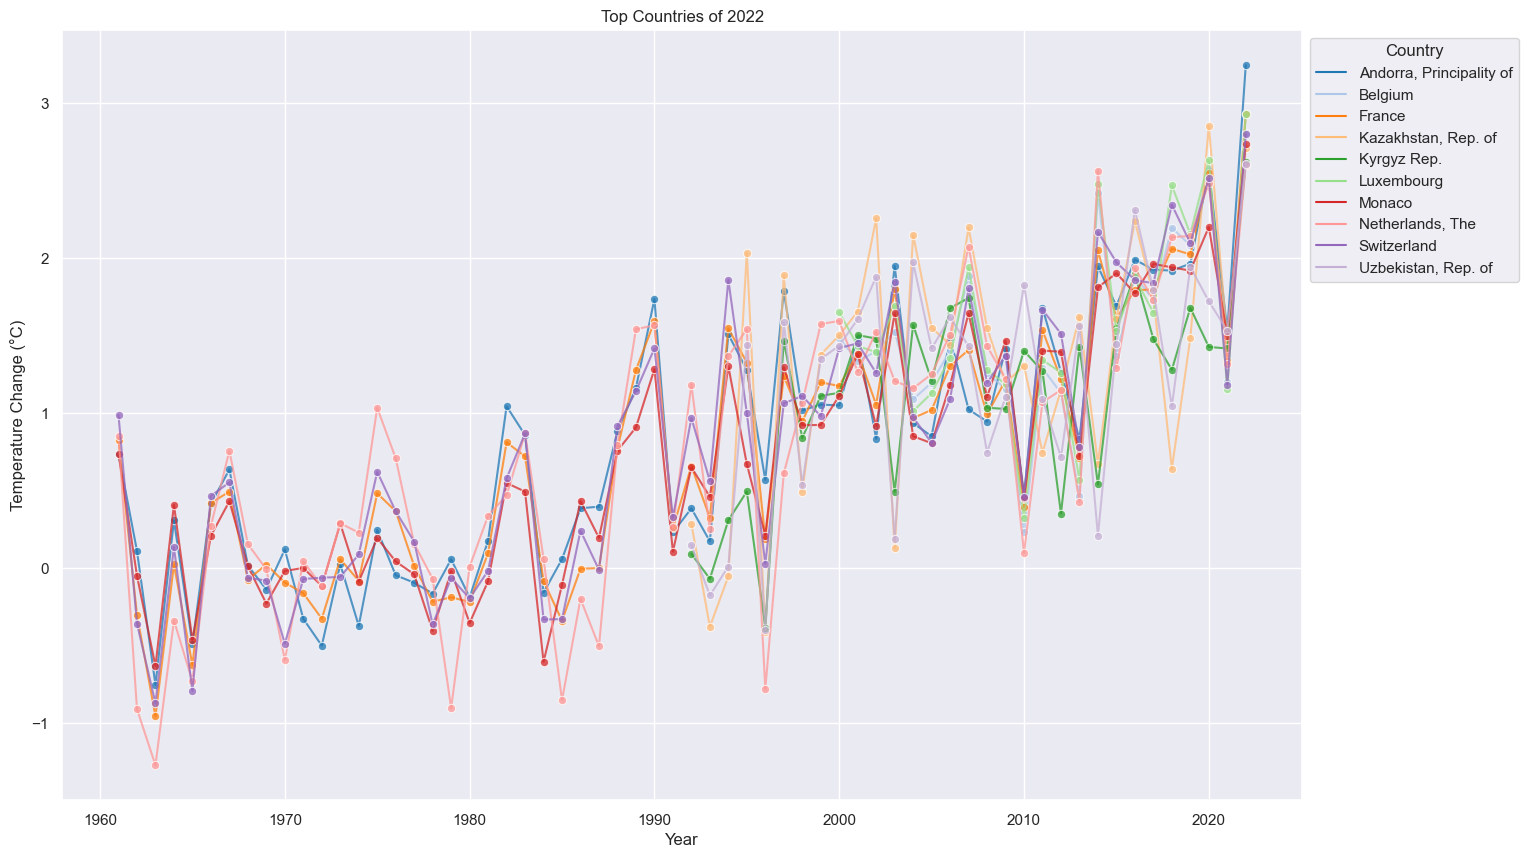

In [26]:
# Figure size
plt.figure(figsize=(16, 10))

# Top 10 countries for 2022 with positive temperature change
positive_2022 = df_climate[df_climate['2022'] > 0]
top_10_2022 = positive_2022.sort_values(by='2022', ascending=False).head(10)
unique_top_countries_2022 = top_10_2022['country'].unique()

# Filtering the melted df for these top countries
df_filtered_2022 = df_climate_melt[df_climate_melt['country'].isin(unique_top_countries_2022)]

# Display the plot
sns.lineplot(data=df_filtered_2022, x='year', y='temperature', hue='country', marker='o', palette='tab20', alpha=0.75)
plt.title('Top Countries of 2022')
plt.xlabel('Year')
plt.ylabel('Temperature Change (°C)')
plt.legend(title='Country', bbox_to_anchor=(1,1), loc='upper left')
plt.show()

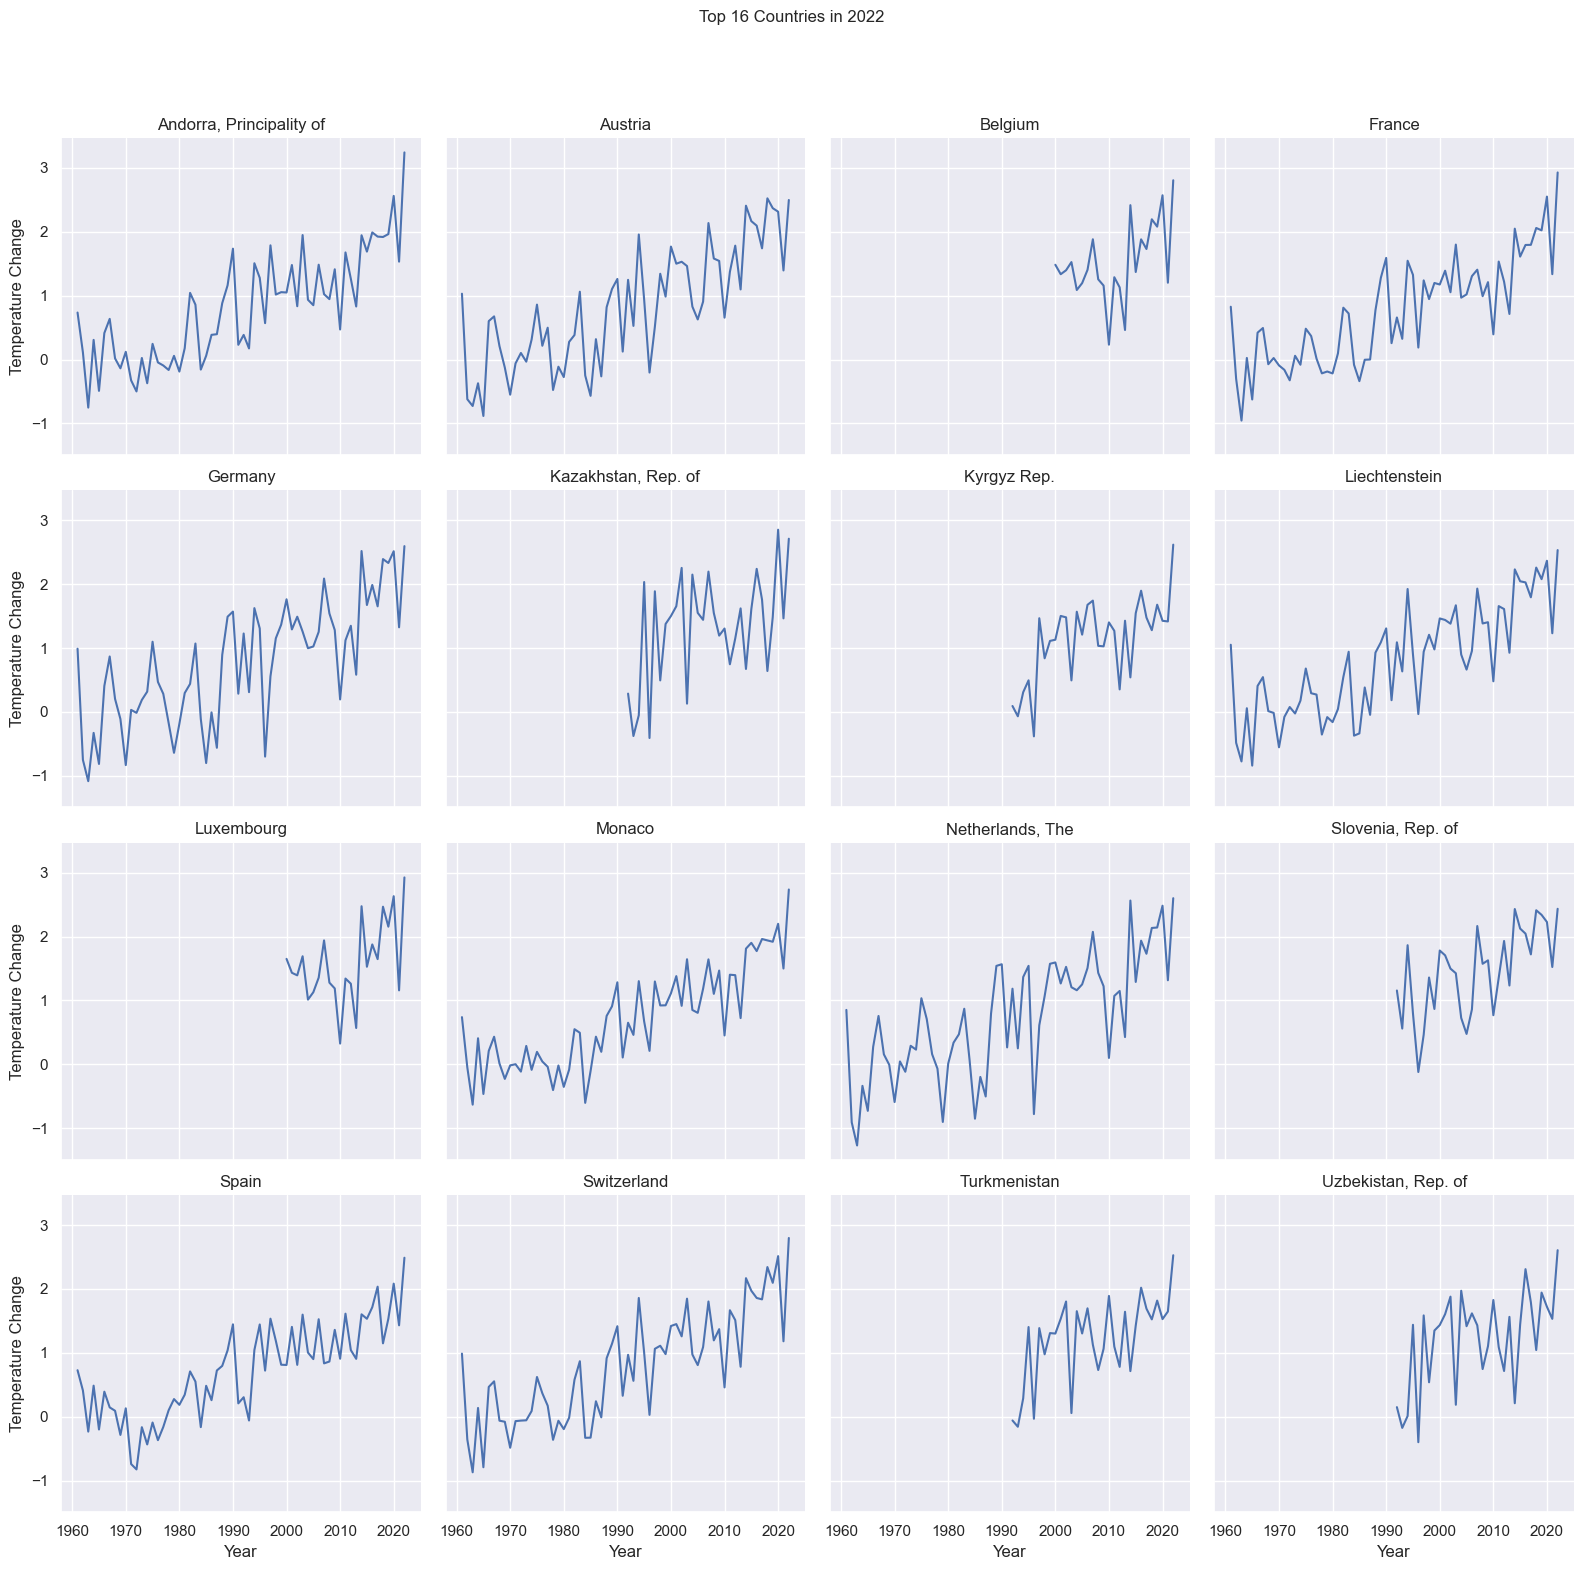

In [27]:
# Set up Facet Grid for the top 16 countries
top_16_2022 = df_climate.sort_values(by='2022', ascending=False).head(16)['country']
df_filtered = df_climate_melt[df_climate_melt['country'].isin(top_16_2022)]
g = sns.FacetGrid(df_filtered, col='country', col_wrap=4, sharex=True, sharey=True, height=4)

# Display plot for each top country
g.map(sns.lineplot, 'year', 'temperature')
g.set_titles('{col_name}')
g.set_axis_labels('Year', 'Temperature Change')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Top 16 Countries in 2022', fontsize=12)
plt.show()
# Get a group of countries to study further: Andora, Austria, France, Germany, 
#Lichtenstein, Monaco, Netherlands, Spain and Switzerland. 
#Dropping the ones that have too many missing values

### 4. EDA — Sub Region

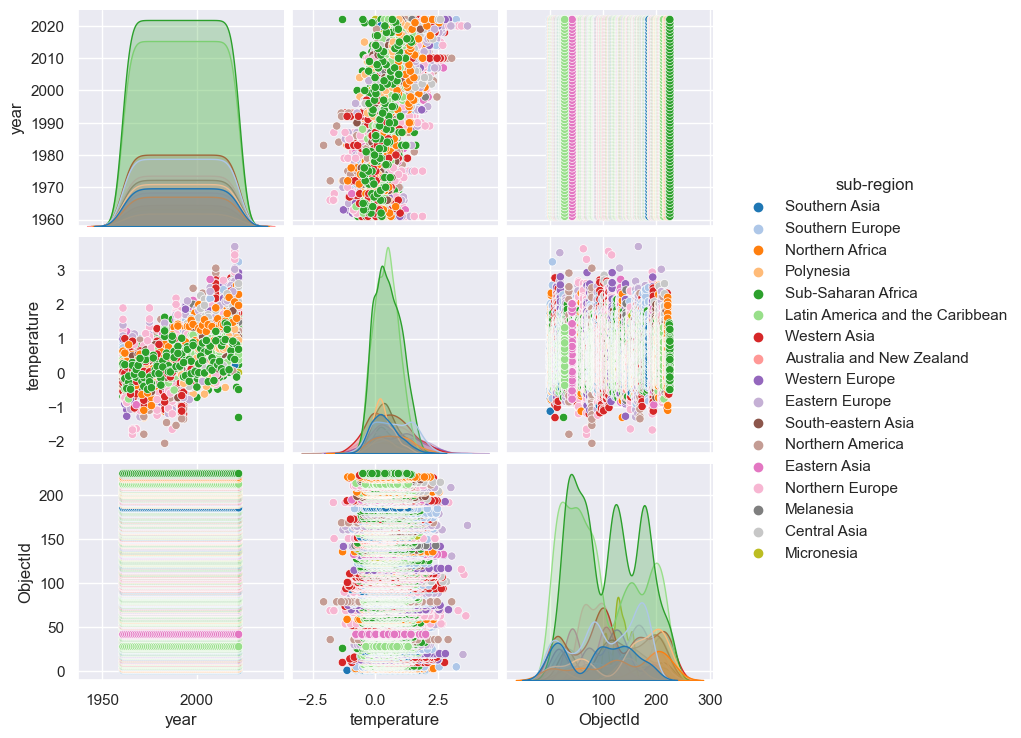

In [28]:
# Pair plot of sub-region
sns.pairplot(data=df_climate_melt, hue='sub-region', palette= 'tab20')
# Sub-Region seems to be relevant for climate change

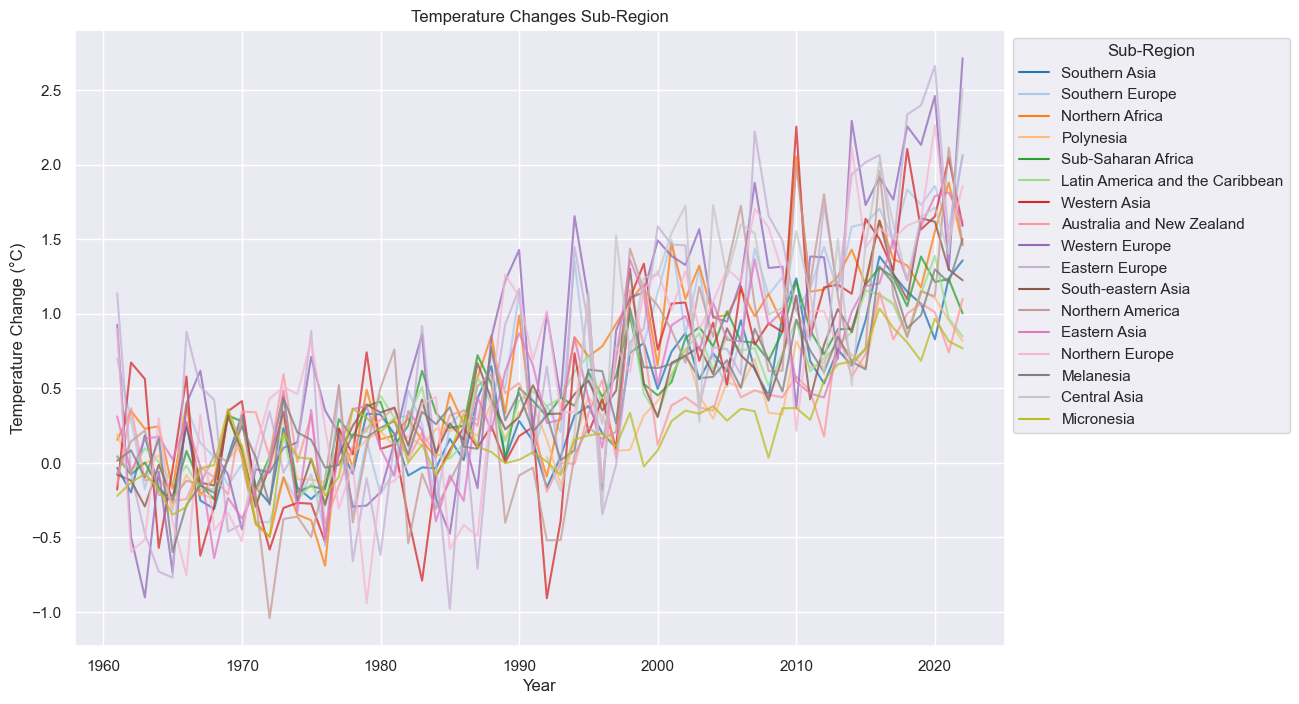

In [29]:
# Convert year to numeric
df_climate_melt['year'] = pd.to_numeric(df_climate_melt['year'], errors='coerce')

# Display plot
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_climate_melt, x='year', y='temperature', hue='sub-region', errorbar=None,palette='tab20', alpha=0.75)
plt.legend(title='Sub-Region', bbox_to_anchor=(1, 1), loc='upper left')
plt.title('Temperature Changes Sub-Region')
plt.xlabel('Year')
plt.ylabel('Temperature Change (°C)')
plt.show()

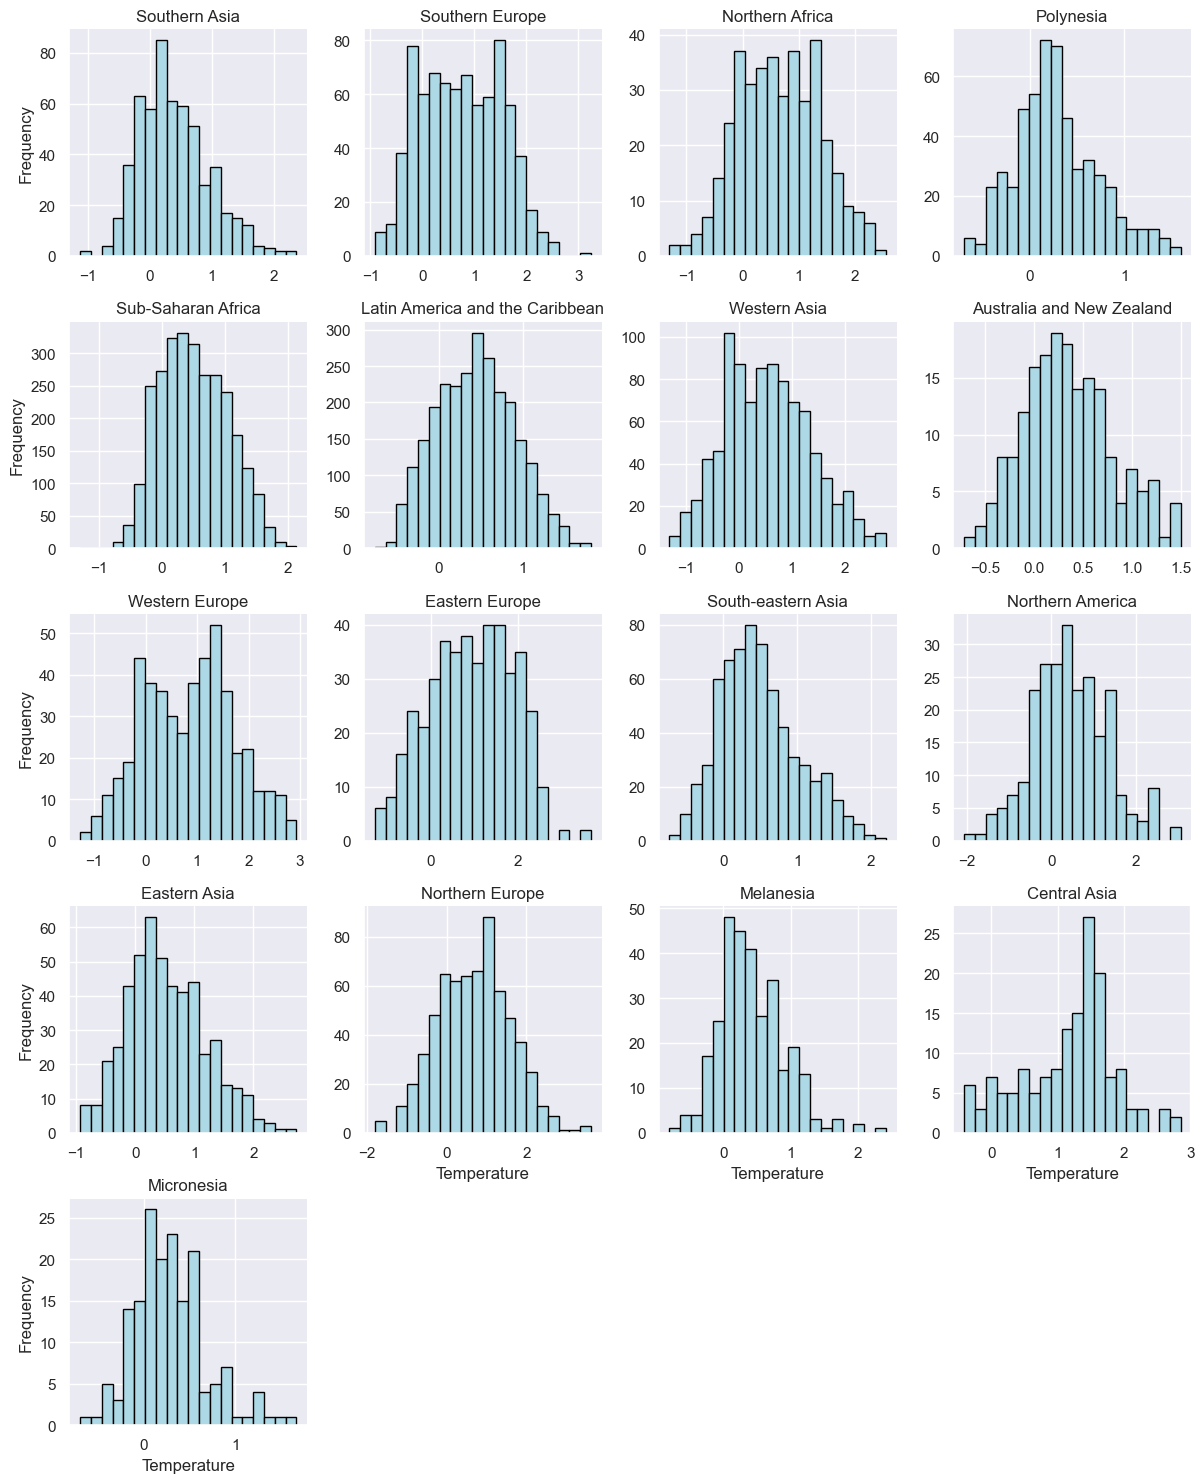

In [30]:
# FacetGrid to plot multiple histograms, plot the histograms for each
g = sns.FacetGrid(df_climate_melt, col='sub-region', col_wrap=4, sharex=False, sharey=False)
g.map(plt.hist, 'temperature', bins=20, color='lightblue', edgecolor='black')

# display plot
g.set_titles('{col_name}')
g.set_axis_labels('Temperature', 'Frequency')
plt.show()
# In the next step, make a group of the regions with more spread,
#the ones that had more than 50% of marking above 1 or below -1

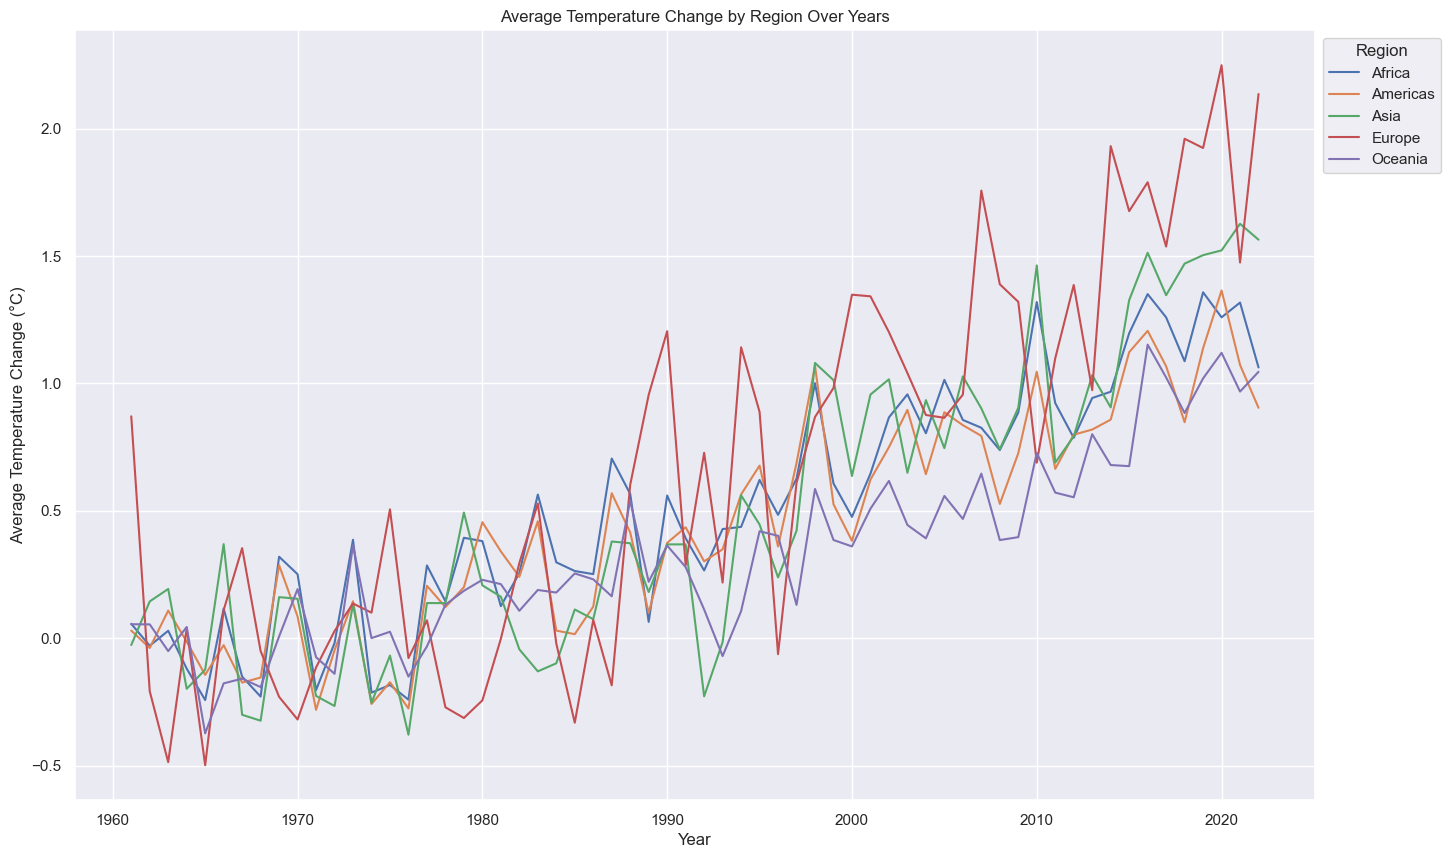

In [31]:
# Aggregate it by 'year' and 'region' to get the average
region_year_avg = df_climate_melt.groupby(['year', 'region'])['temperature'].mean().reset_index()

# Display line plot
plt.figure(figsize=(16, 10))
sns.lineplot(data=region_year_avg, x='year', y='temperature', hue='region', color='tab10')
plt.title('Average Temperature Change by Region Over Years')
plt.ylabel('Average Temperature Change (°C)')
plt.xlabel('Year')
plt.legend(title='Region', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()
#Temperature change in Europe and Asia show a remarkalbe growth compare to others

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


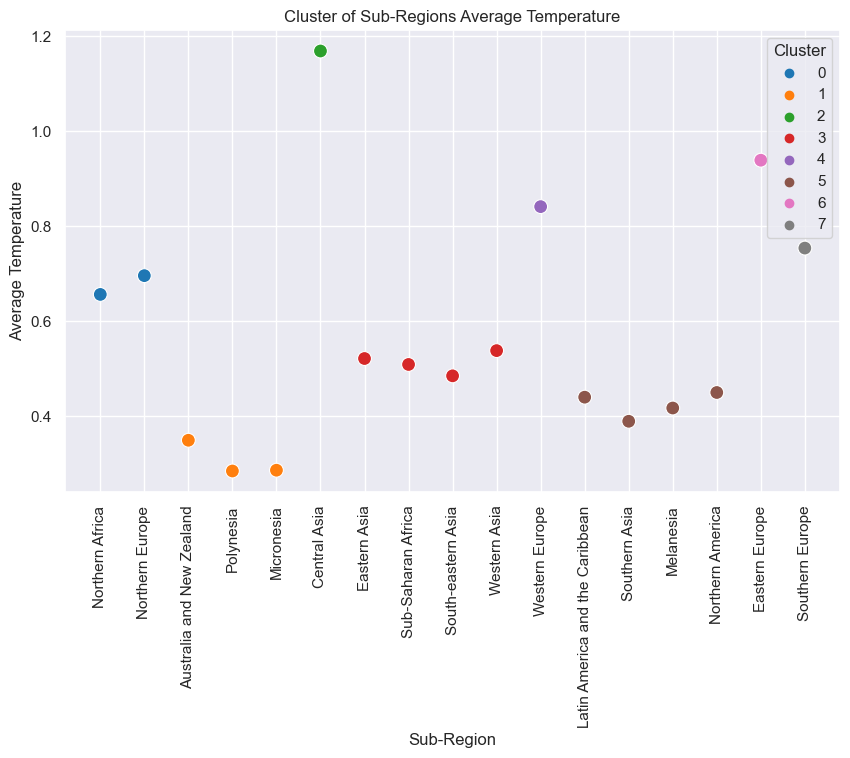

In [38]:
# n_clusters=8
#Confirming Temperature change in Europe and Asia
     
# Cluster based on the average temperature for each sub-region
data_for_clustering = df_climate_melt.groupby('sub-region')['temperature'].mean().reset_index()

# Perform K-Means clustering, experiment with (n_clusters)
kmeans = KMeans(n_clusters=8, random_state=0).fit(data_for_clustering[['temperature']])

# Assign the cluster labels
data_for_clustering['cluster'] = kmeans.labels_

# Sort the clusters
ordered_clusters = data_for_clustering.sort_values('cluster')

# Dis[lay plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=ordered_clusters, x='sub-region', y='temperature', hue='cluster', palette='tab10', s=100)
plt.xticks(rotation=90) 
plt.title('Cluster of Sub-Regions Average Temperature')
plt.xlabel('Sub-Region')
plt.ylabel('Average Temperature')
plt.legend(title='Cluster')
plt.show()

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


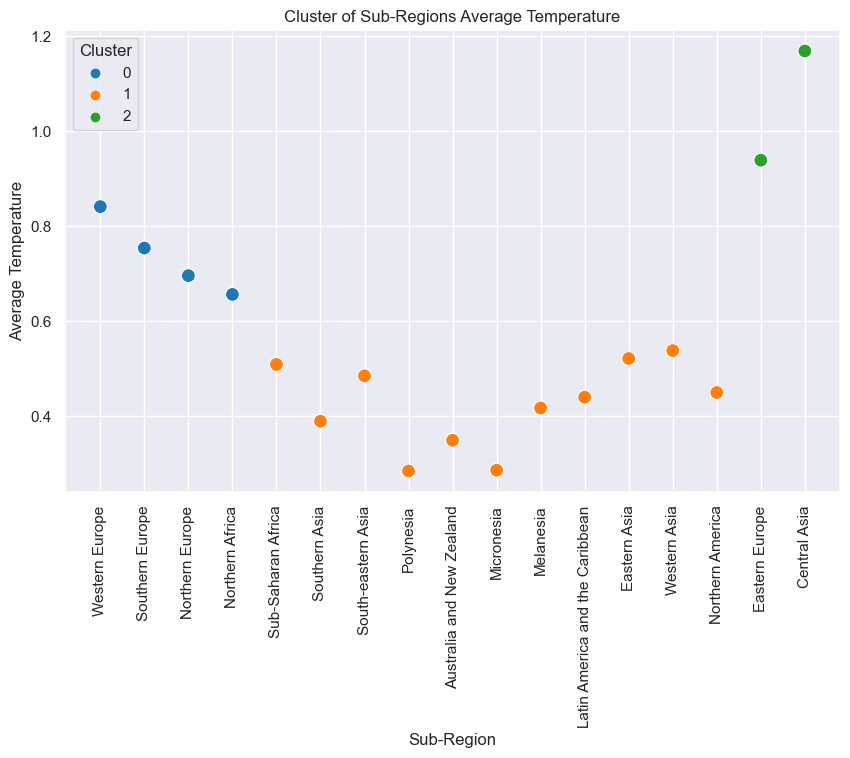

In [33]:
# n_clusters=3
#Confirming Temperature change in Europe and Asia

# Cluster based on the average temperature for each sub-region
data_for_clustering = df_climate_melt.groupby('sub-region')['temperature'].mean().reset_index()

# Perform K-Means clustering, experiment with (n_clusters)
kmeans = KMeans(n_clusters=3, random_state=0).fit(data_for_clustering[['temperature']])

# Assign the cluster labels
data_for_clustering['cluster'] = kmeans.labels_

# Sort the clusters
ordered_clusters = data_for_clustering.sort_values('cluster')

# Dis[lay plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=ordered_clusters, x='sub-region', y='temperature', hue='cluster', palette='tab10', s=100)
plt.xticks(rotation=90) 
plt.title('Cluster of Sub-Regions Average Temperature')
plt.xlabel('Sub-Region')
plt.ylabel('Average Temperature')
plt.legend(title='Cluster')
plt.show()

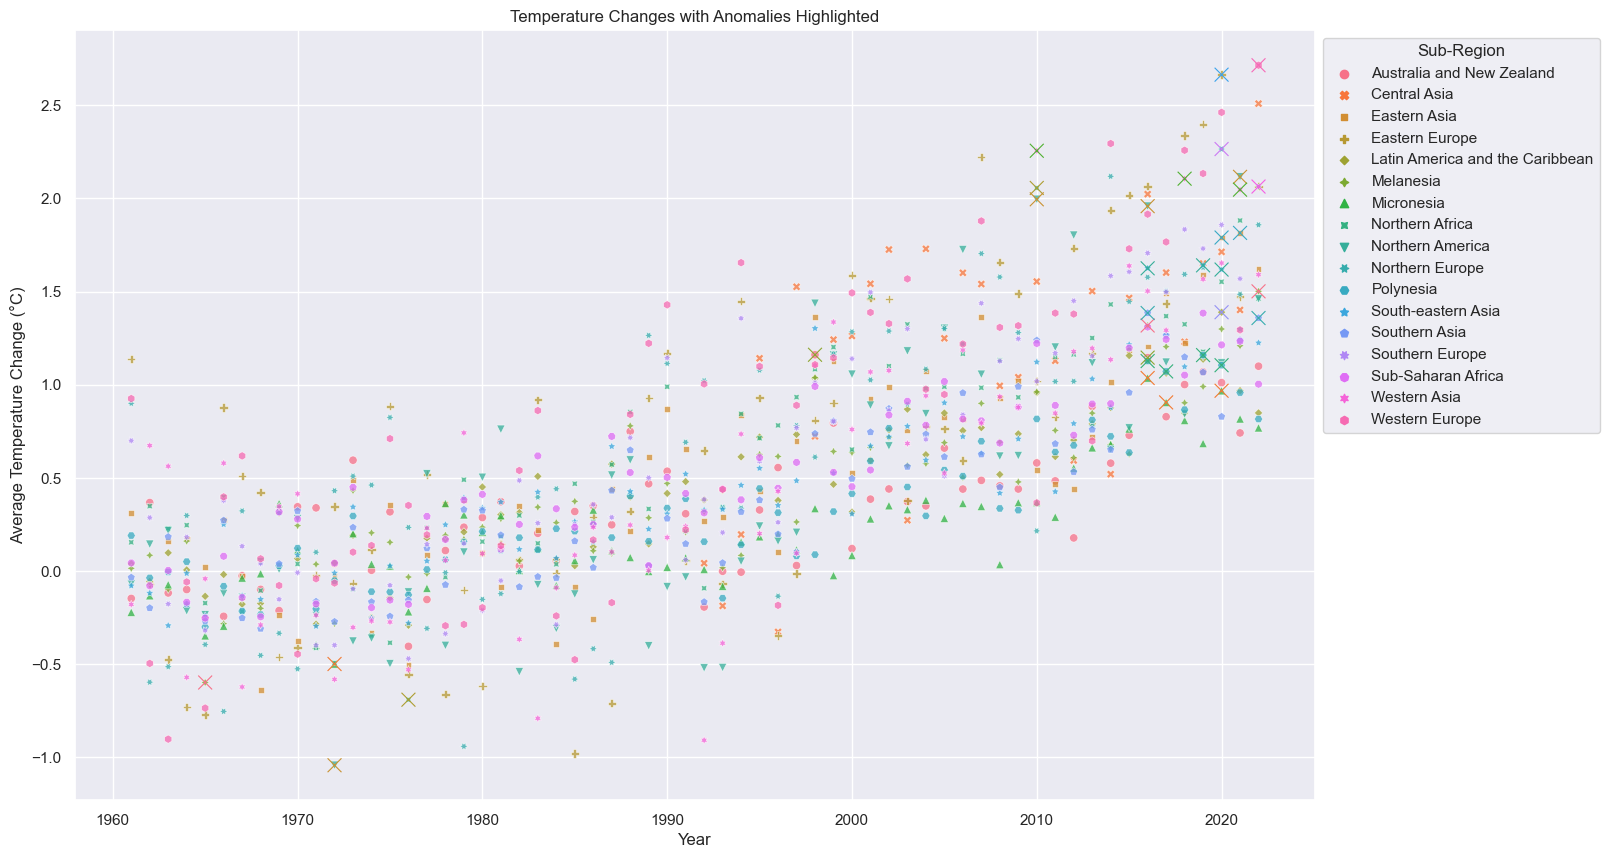

In [34]:
# Group the data by 'year' and 'sub-region' and calculate the mean temperature for each group
grouped_data = df_climate_melt.groupby(['year', 'sub-region'])['temperature'].mean().reset_index()

# Calculate Z-score within each sub-region across different years
grouped_data['z_score'] = grouped_data.groupby('sub-region')['temperature'].transform(lambda x: zscore(x, ddof=1))

# Filter to identify years with unusual temperature changes (absolute z_score > 2)
anomalies = grouped_data[grouped_data['z_score'].abs() > 2]

# Plot average temperature
plt.figure(figsize=(16, 10))
sns.scatterplot(data=grouped_data, x='year', y='temperature', hue='sub-region', style='sub-region', alpha=0.75)

# Plot with Highlighted anomalies in the data
sns.scatterplot(data=anomalies, x='year', y='temperature', hue='sub-region', s=100, legend=False, edgecolor='black', marker='x')

plt.title('Temperature Changes with Anomalies Highlighted')
plt.xlabel('Year')
plt.ylabel('Average Temperature Change (°C)')
plt.legend(title='Sub-Region', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()
#Very interesting view of the changes in climate but too busy and confusing to read

In [35]:
# Display the anomalies Data Frame as a list
print(anomalies[['year', 'sub-region', 'temperature', 'z_score']].to_string(index=False))

 year                      sub-region  temperature   z_score
 1965                       Melanesia    -0.597800 -2.347382
 1972                      Micronesia    -0.498500 -2.086777
 1972                Northern America    -1.041750 -2.030877
 1976                 Northern Africa    -0.690000 -2.065177
 1998       Australia and New Zealand     1.160667  2.119502
 2010                 Northern Africa     2.055667  2.222212
 2010                Northern America     1.994750  2.103725
 2010                    Western Asia     2.255313  2.318433
 2016       Australia and New Zealand     1.145333  2.079427
 2016                       Melanesia     1.317750  2.038508
 2016                      Micronesia     1.036000  2.421688
 2016                Northern America     1.958000  2.053685
 2016                       Polynesia     1.126857  2.176716
 2016              South-eastern Asia     1.624545  2.303212
 2016                   Southern Asia     1.384667  2.113459
 2017                   

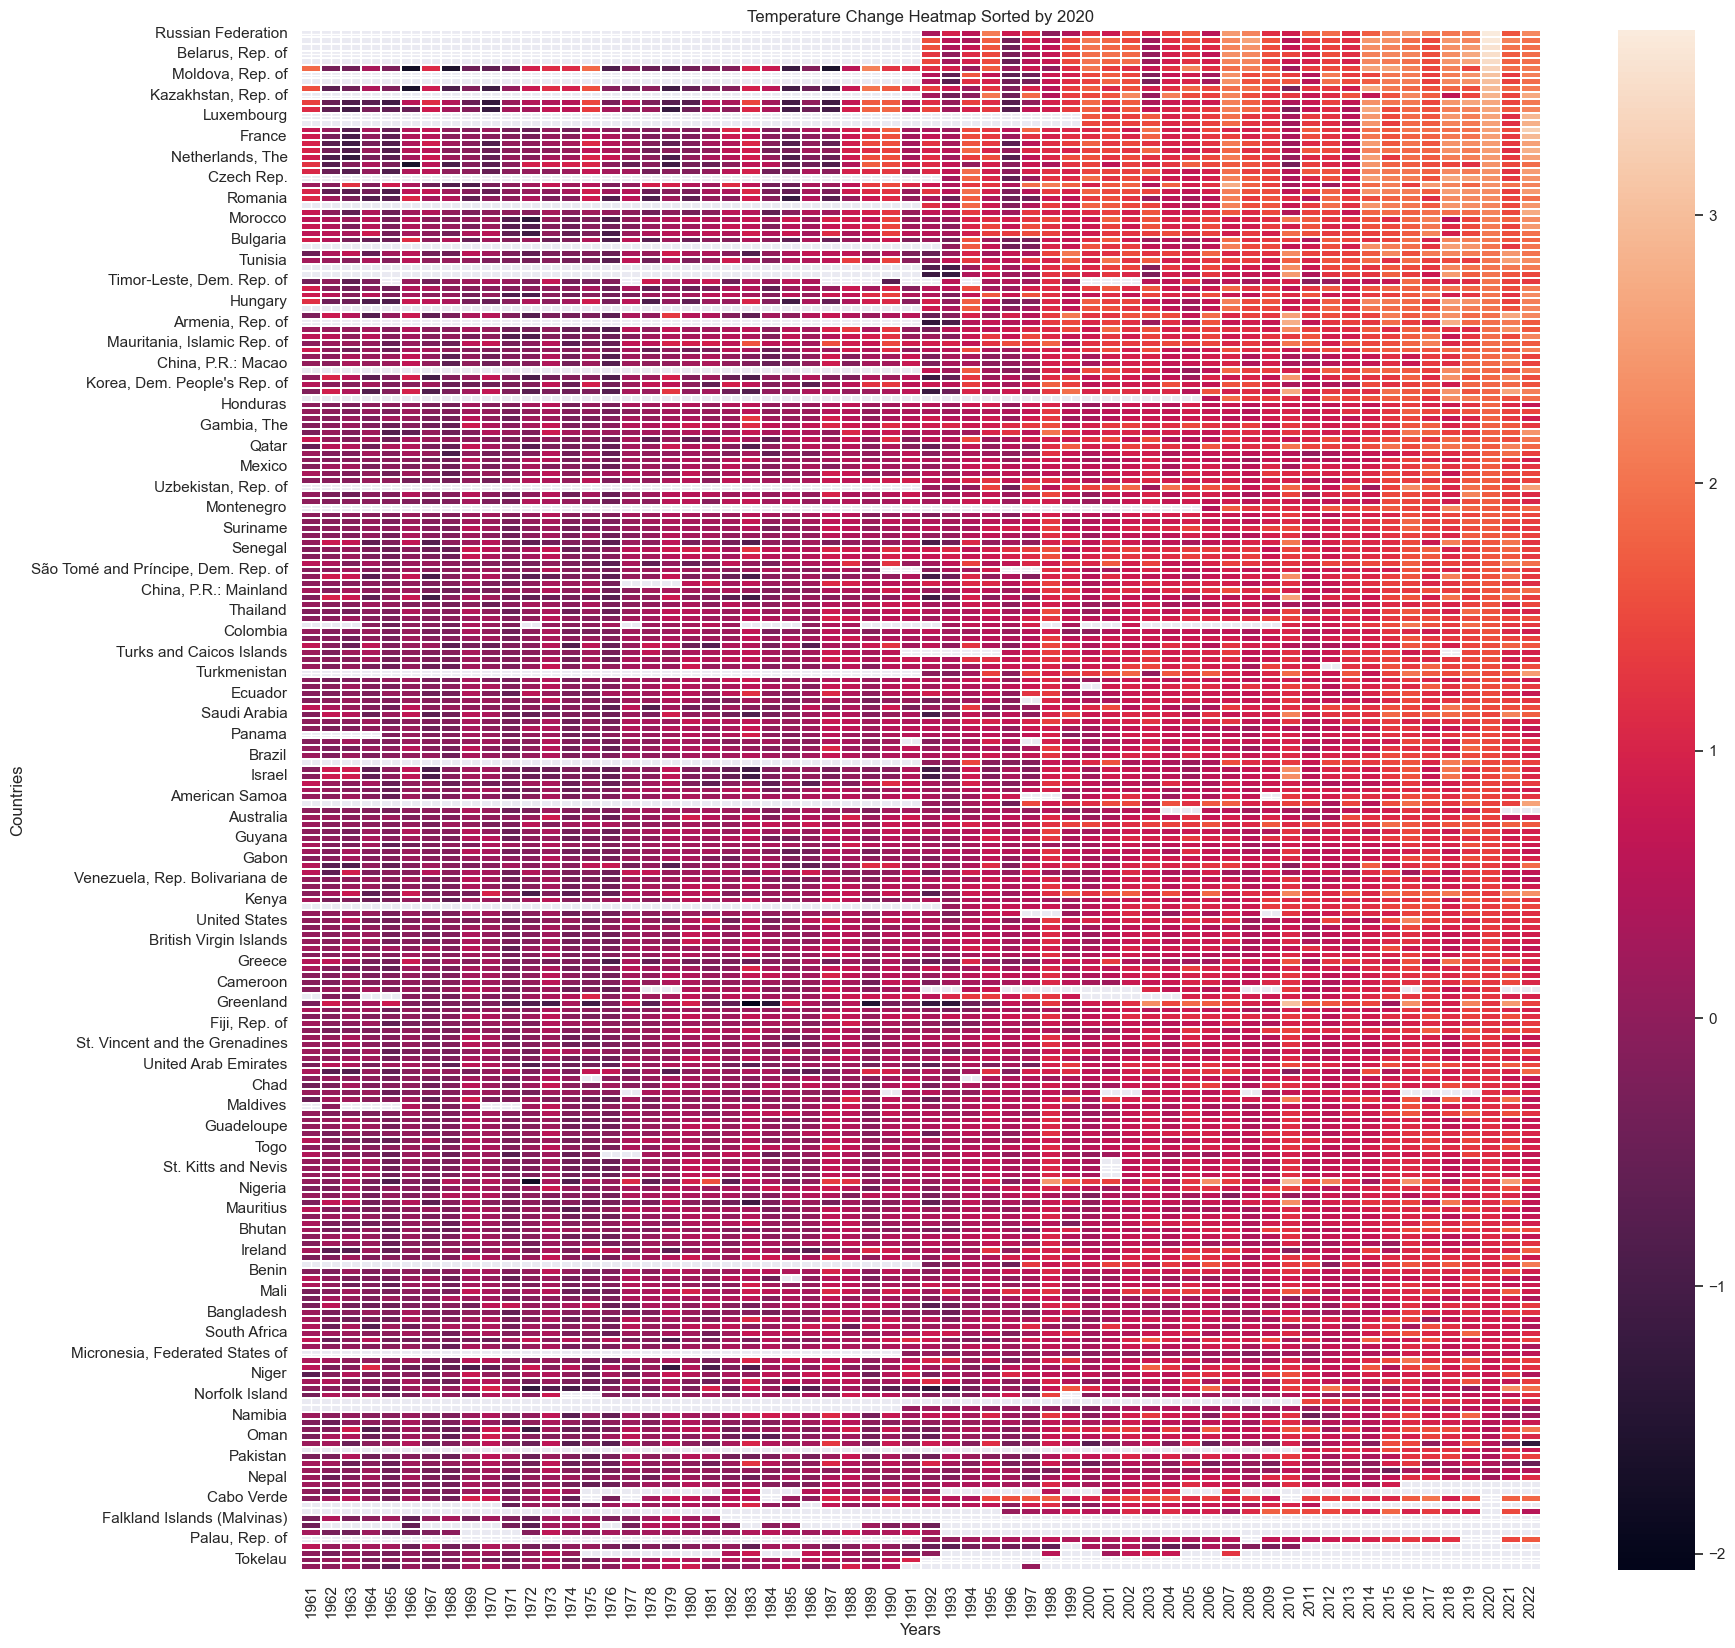

In [36]:
# Sort the countries based on their temperature change in 2020, 
# the year with more anomalies
sorted_countries = df_climate.set_index('country').sort_values(by='2020', ascending=False)

# Drop other columns
heatmap_data = sorted_countries.drop(['ISO3', 'ISO2', 'ObjectId', 'region', 'sub-region'], axis=1)

# Display plot heatmap
plt.figure(figsize=(20, 20))
sns.color_palette("flare", as_cmap=True)
sns.heatmap(heatmap_data, linecolor='white', linewidths=0.1)
plt.title('Temperature Change Heatmap Sorted by 2020')
plt.xlabel('Years')
plt.ylabel('Countries')
plt.show()

### 4. EDA — Weather

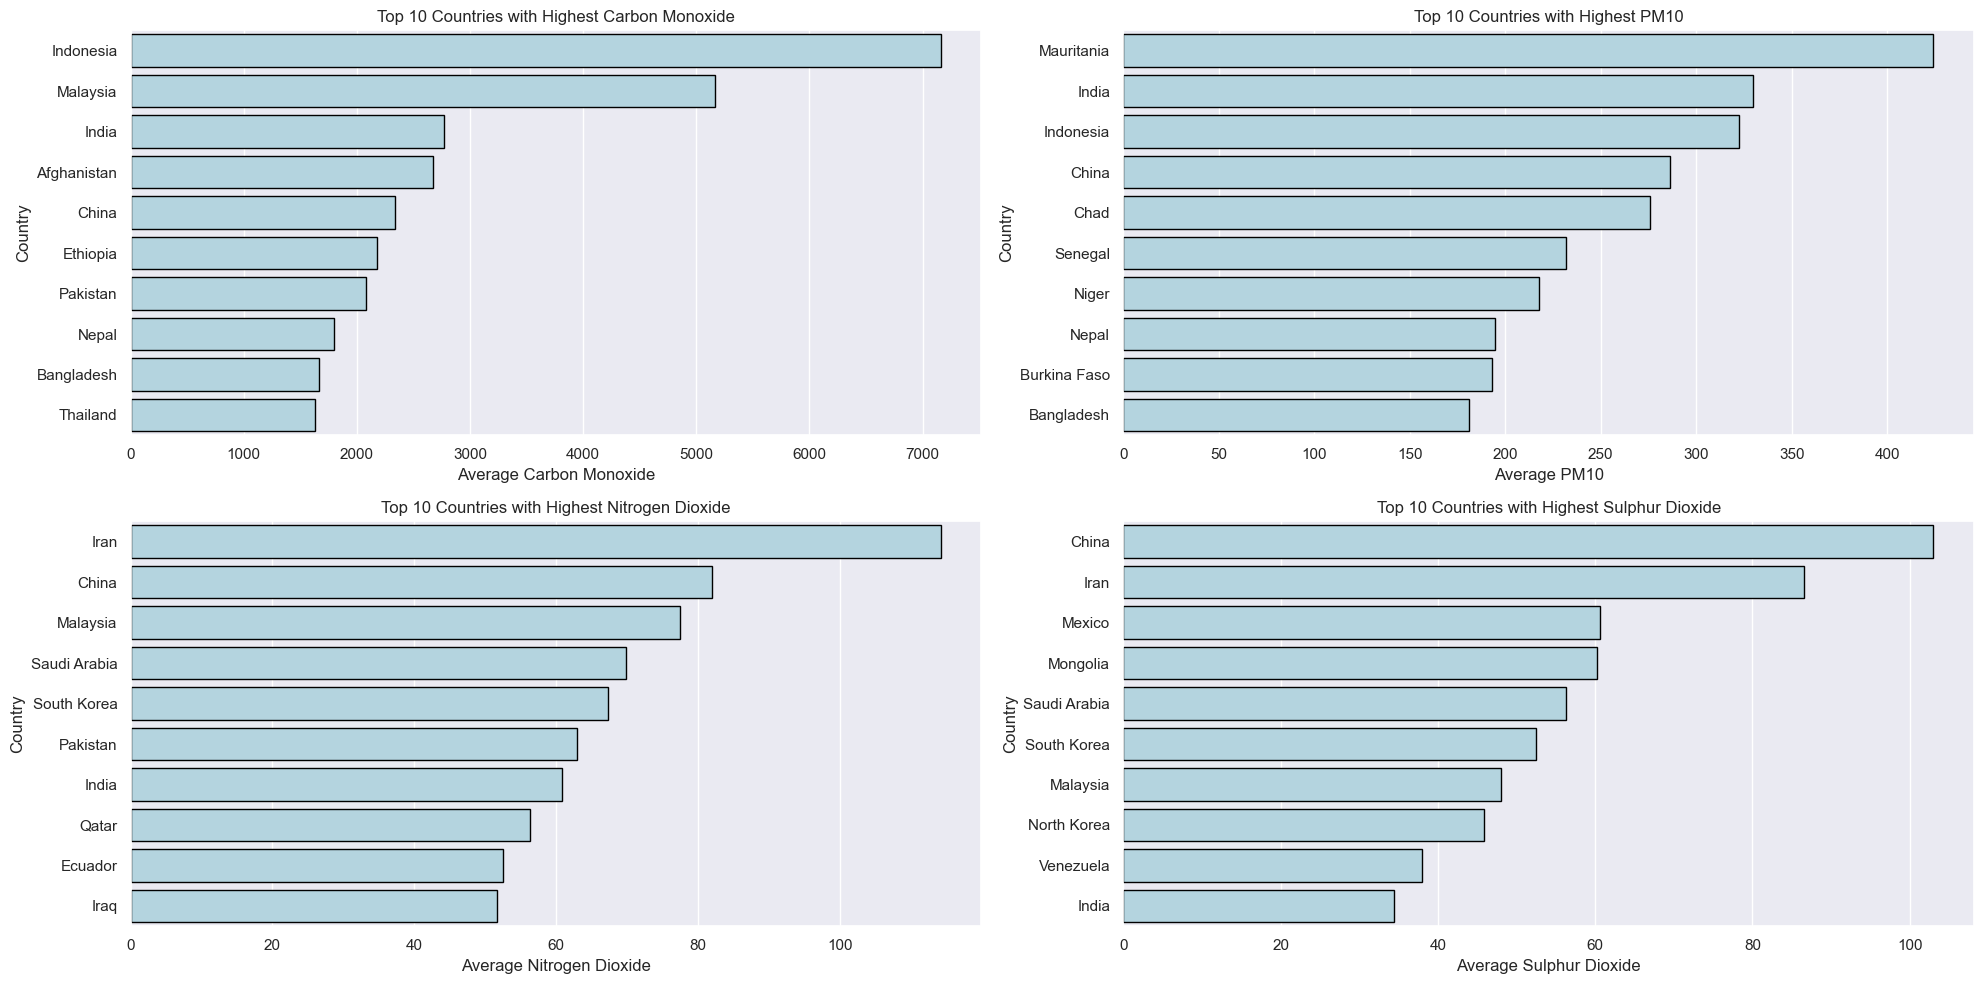

In [37]:
# Based on finding of google search I will use 'air_quality_Carbon_Monoxide' , 'air_quality_PM10' , 
# 'air_quality_Nitrogen_dioxide', and 'air_quality_Sulphur_dioxide to plot average of countries
# to understand if the worst values for this air quality match with the highest temprature change

# Aggregate data for each country
avg_air_quality = df_weather.groupby('country')[[
    'air_quality_Carbon_Monoxide', 
    'air_quality_Nitrogen_dioxide', 
    'air_quality_Sulphur_dioxide', 
    'air_quality_PM10'
]].mean().reset_index()

# Sort the countries based on each air quality measurement
sorted_co = avg_air_quality.sort_values(by='air_quality_Carbon_Monoxide', ascending=False).head(10)
sorted_pm10 = avg_air_quality.sort_values(by='air_quality_PM10', ascending=False).head(10)
sorted_no2 = avg_air_quality.sort_values(by='air_quality_Nitrogen_dioxide', ascending=False).head(10)
sorted_so2 = avg_air_quality.sort_values(by='air_quality_Sulphur_dioxide', ascending=False).head(10)


fig, axes = plt.subplots(2, 2, figsize=(20, 10))

# Plot for 'air_quality_Carbon_Monoxide'
sns.barplot(x='air_quality_Carbon_Monoxide', y='country', data=sorted_co, ax=axes[0, 0], color='lightblue', edgecolor='black')
axes[0, 0].set_title('Top 10 Countries with Highest Carbon Monoxide')
axes[0, 0].set_xlabel('Average Carbon Monoxide')
axes[0, 0].set_ylabel('Country')

# Plot for 'air_quality_PM10'
sns.barplot(x='air_quality_PM10', y='country', data=sorted_pm10, ax=axes[0, 1], color='lightblue', edgecolor='black')
axes[0, 1].set_title('Top 10 Countries with Highest PM10')
axes[0, 1].set_xlabel('Average PM10')
axes[0, 1].set_ylabel('Country')

# Plot for 'air_quality_Nitrogen_dioxide'
sns.barplot(x='air_quality_Nitrogen_dioxide', y='country', data=sorted_no2, ax=axes[1, 0], color='lightblue', edgecolor='black')
axes[1, 0].set_title('Top 10 Countries with Highest Nitrogen Dioxide')
axes[1, 0].set_xlabel('Average Nitrogen Dioxide')
axes[1, 0].set_ylabel('Country')

# Plot for 'air_quality_Sulphur_dioxide'
sns.barplot(x='air_quality_Sulphur_dioxide', y='country', data=sorted_so2, ax=axes[1, 1], color='lightblue', edgecolor='black')
axes[1, 1].set_title('Top 10 Countries with Highest Sulphur Dioxide')
axes[1, 1].set_xlabel('Average Sulphur Dioxide')
axes[1, 1].set_ylabel('Country')

plt.tight_layout()
plt.show()

# Weather dataset is inconclusive, much more explorations are needed, 
# this could be done in another project folowing this one.